## 1.1 セレクションバイアス
**バイアス** = 分析結果 - 本当の効果

本当の効果 = グループAの効果 - グループBの効果 - **セレクションバイアス**(意図的にグループが分けられている ex. 購買意欲の高いユーザーのみに介入を行うなど)

↑を取り除かないと正しい検証ができず、**正しい意思決定**ができない

## 1.2 RCT(Randomized Controlled Trial)
生存者バイアス: どちらか一方のパターンしか**観測**できない(ex. 広告メールが配信された場合の購入額 or その逆)

=> タイムマシンでもあれば検証可能 => 不可能

=> **介入**(施策)を無作為化し検証 =>　介入以外の要因を平均的に同一にできる => RCT => **ABテスト**とも呼ばれる

## 1.3 効果を測る理想的な方法
手元のデータを分析することは**母集団**の性質を推定することである。

$Y{i} = Y{i}^{(0)}(1 - Z{i}) + Y{i}^{(1)}Z{i} $ i: インデックス, Z: [0: 未介入, 1: 介入], Y: 効果[0: 潜在的, 1: 介入による]

本当の効果 = 介入した時の効果 - 介入しない時の効果 と仮定することを**ポテンシャルアウトカムフレームワーク**

$τ(タウ) = Y^{(1)} - Y^{(0)}$ => 生存者バイアスで観測不可能 => $τ = E[Y^{(1)}] - E[Y^{(0)}]$

τが偶然えられたのかどうかをt検定で検証する(帰無仮説: τ = 0, 対立仮設 ≠ 0) もしくは 信頼区間

## 1.4 メールマーケティングの効果検証
ECサイトのユーザーにRCTを適応したメールメーケティングを行った時のデータセット
=> セレクションバイアスの問題はない

In [13]:
import numpy as np
import pandas as pd
import scipy.stats as st

In [5]:
# !wget http://www.minethatdata.com/Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv ../data/

In [6]:
df = pd.read_csv("../data/E-MailAnalytics_DataMiningChallenge.csv")
print(df.shape)
print(df.isnull().sum())
print(df.info())
print(df.describe())
df.head()

(64000, 12)
recency            0
history_segment    0
history            0
mens               0
womens             0
zip_code           0
newbie             0
channel            0
segment            0
visit              0
conversion         0
spend              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recency          64000 non-null  int64  
 1   history_segment  64000 non-null  object 
 2   history          64000 non-null  float64
 3   mens             64000 non-null  int64  
 4   womens           64000 non-null  int64  
 5   zip_code         64000 non-null  object 
 6   newbie           64000 non-null  int64  
 7   channel          64000 non-null  object 
 8   segment          64000 non-null  object 
 9   visit            64000 non-null  int64  
 10  conversion       64000 non-null  int64  
 11  spend      

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0


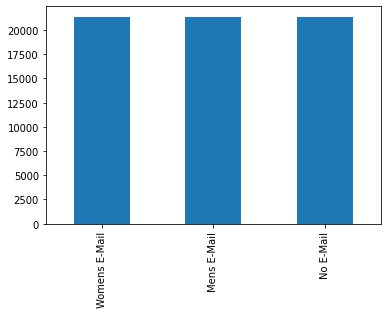

In [7]:
df.segment.value_counts().plot.bar()

In [8]:
# 問題を簡略化するために女性向けのメールを削除する
df_mens = df.query("segment != 'Womens E-Mail'").copy()
print(df_mens.shape)
df_mens.head()

(42613, 12)


,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
8,9,5) $500 - $750,675.07,1,1,Rural,1,Phone,Mens E-Mail,0,0,0.0
13,2,2) $100 - $200,101.64,0,1,Urban,0,Web,Mens E-Mail,1,0,0.0
14,4,3) $200 - $350,241.42,0,1,Rural,1,Multichannel,No E-Mail,0,0,0.0


In [9]:
# 介入フラグ(介入していたら 1)を作成
df_mens["is_intervention"] = (df_mens.segment == "Mens E-Mail").astype(int)
df_mens.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,is_intervention
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0,1
8,9,5) $500 - $750,675.07,1,1,Rural,1,Phone,Mens E-Mail,0,0,0.0,1
13,2,2) $100 - $200,101.64,0,1,Urban,0,Web,Mens E-Mail,1,0,0.0,1
14,4,3) $200 - $350,241.42,0,1,Rural,1,Multichannel,No E-Mail,0,0,0.0,0


In [70]:
df_mens.to_csv("../data/E-MailAnalytics_DataMiningChallenge_Mens.csv", index=None)

In [68]:
# 介入フラグごとの集計
df_mens.groupby("is_intervention").agg({
    "conversion": "mean",
    "spend": "mean",
    "history": "mean",
    "recency": "mean",
    "zip_code": "count"
}).rename(columns={"zip_code": "count"})

,conversion,spend,history,recency,count
is_intervention,,,,,
0,0.005726,0.652789,240.882653,5.749695,21306
1,0.012531,1.422617,242.835931,5.773642,21307


### 2標本 t-検定

$$H{0}: メールの介入があったユーザーとないユーザーとの売上に差はない$$
$$H{1}: メールの介入があったユーザーとないユーザーとの売上に差はある$$
$$有意水準 = 5\%$$


In [12]:
# 介入があるユーザー
groupA_spend = df_mens.query("is_intervention == 1").spend
# 介入がないユーザー
groupB_spend = df_mens.query("is_intervention == 0").spend

In [25]:
print(groupA_spend.describe())
print(groupB_spend.describe())

count    21307.000000
mean         1.422617
std         17.754205
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        499.000000
Name: spend, dtype: float64
count    21306.000000
mean         0.652789
std         11.588200
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        499.000000
Name: spend, dtype: float64


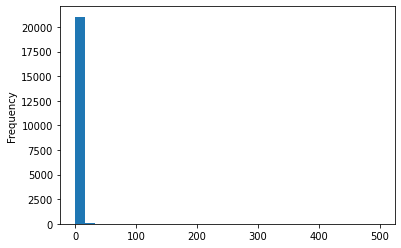

In [34]:
groupA_spend.plot.hist(bins=30)

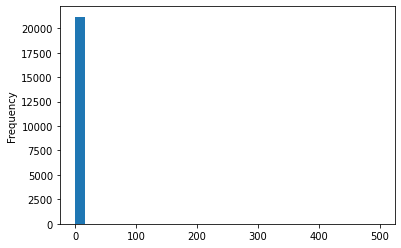

In [33]:
groupB_spend.plot.hist(bins=30)

In [37]:
groupA_spend.shape[0]

21307

In [69]:
# # 対応のないt検定スクラッチ
groupA_mean_hat = groupA_spend.mean()
groupB_mean_hat = groupB_spend.mean()
degree_of_freedom = groupA_spend.shape[0] + groupB_spend.shape[0] - 2
pooled_variance = ((groupA_spend.shape[0] - 1) * groupA_spend.var(ddof=1)+(groupB_spend.shape[0] - 1) * groupB_spend.var(ddof=1)) \
/ degree_of_freedom
# print(groupA_mean_hat, groupB_mean_hat, pooled_variance)
group_diff_mean = groupA_mean_hat - groupB_mean_hat
print("グループ間の平均の差", group_diff_mean)
t_val = group_diff_mean / (np.sqrt(pooled_variance) * np.sqrt((1/groupA_spend.shape[0] + 1/groupB_spend.shape[0])))
print("t値: ",t_val)
p_val = (1 - st.t(degree_of_freedom).cdf(t_val)) * 2 # 両側
print("p値", p_val)

グループ間の平均の差 0.7698271558945367
t値:  5.300090294465472
p値 1.1632008733997168e-07


In [11]:
# 対応のないt検定
t_val, p_val = st.ttest_ind(groupA_spend, groupB_spend)
print("t値:", t_val)
print("p値:", p_val)

t値: 5.300090294465472
p値: 1.163200872605869e-07


$$有意水準5\%で帰無仮説は棄却され、対立仮説が採択される$$
$$メールの介入により売り上げに差が出る(有意である)と言える$$

## 1.5 ビジネスにおける因果推論の必要性
- ビジネス視点だと購買意欲が高いユーザーに対して介入した方が売り上げが伸びると予想される
- 効果検証視点だとRCTは介入がランダムのため正しい効果を検証できる

↓

RCTはビジネス上コストがかかる => ビジネス上かなり難しい

↓

因果推論などのバイアスの影響が少ない分析結果を得られる手法を使う